# Beispielcode Entscheidungsbäume

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

pd.options.display.max_columns = 50
pd.options.display.max_rows = 200
plt.rcParams['figure.figsize'] = [16, 9]

## Beispiel 1: Entscheidungsbaum für das "Rad fahren" Beispiel aus der Vorlesung

In [17]:
df_rad = pd.DataFrame({"Wetterlage": ["sonnig", "Regen", "Regen", "Regen", "sonnig", "Regen", "sonnig", "sonnig", "sonnig"],
                   "Schnee": ["Nein", "Nein", "Nein", "Nein", "Nein", "Nein", "Nein", "Ja", "Ja"],
                   "Auto kaputt": ["Nein", "Nein", "Ja", "Nein", "Ja", "Ja", "Nein", "Nein", "Ja"],
                   "Start 8:00": ["Nein", "Nein", "Nein", "Nein", "Nein", "Ja", "Ja", "Nein", "Nein"],
                   "Rad fahren": ["Ja", "Nein", "Ja", "Nein", "Ja", "Ja", "Nein", "Nein", "Nein"]})

Wetterlage 0.09582771325373216
Schnee 0.5880378925029466
Auto kaputt 0.23150275745152366
Start 8:00 0.0846316367917976


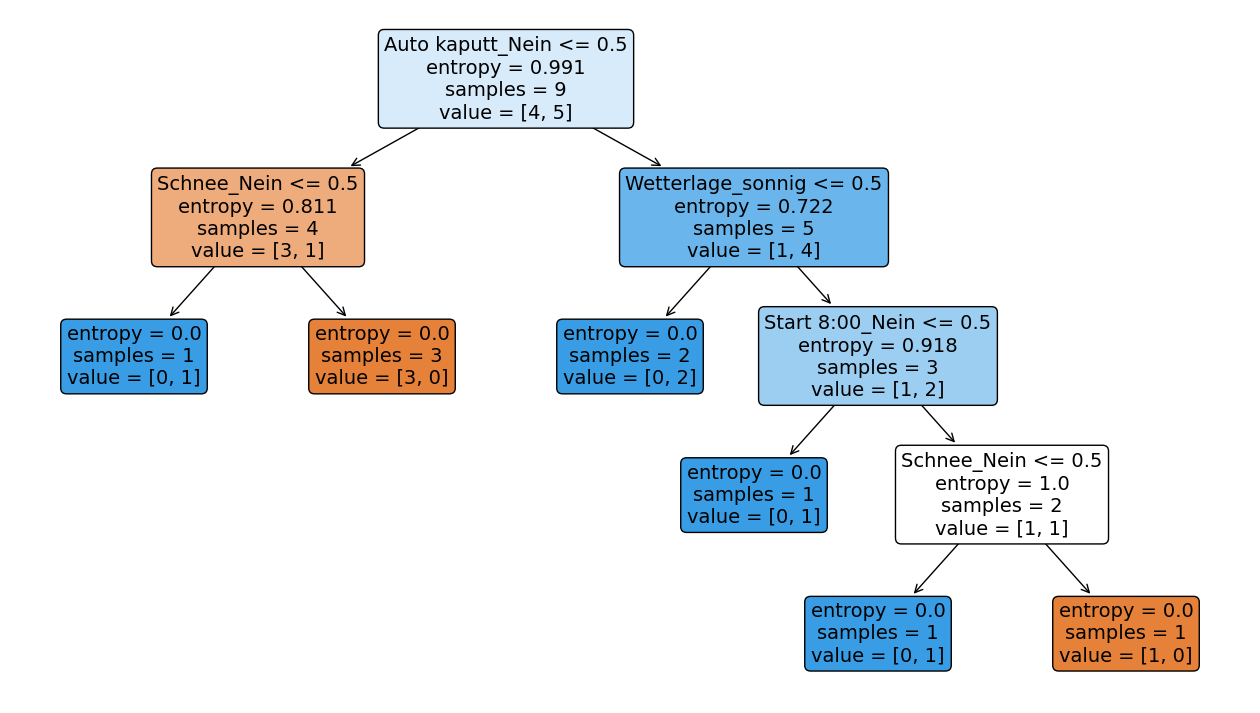

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Leider muss man die kategorischen Features doch One-Hot encoden, da sklearn es so will.
X = pd.get_dummies(df_rad[["Wetterlage", "Schnee", "Auto kaputt", "Start 8:00"]], drop_first=True)
y = pd.get_dummies(df_rad["Rad fahren"], drop_first=True)

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42, criterion="entropy")
tree_clf.fit(X, y)

plot_tree(tree_clf, feature_names=list(X.columns), rounded=True, filled=True, fontsize=14)
tree_clf.score(X, y)

for name, score in zip(["Wetterlage", "Schnee", "Auto kaputt", "Start 8:00"], tree_clf.feature_importances_):
    print(name, score)

## Beispiel 2: Entscheidungsbaum und Random Forest für den Iris Datensatz
Hier bietet der Random Forest keinen zusätzlichen Performancegewinn, da bereits der Entscheidungsbaum eine perfekte Vorhersage (auf dem Test Set) liefert.

'\nprint("Feature importance decision tree")\nfor name, score in zip(iris.feature_names, tree_clf.feature_importances_):\n    print(name, score)\n\nrf_clf = RandomForestClassifier()\nrf_clf.fit(X_train, y_train)\n\nprint("Feature importance random forest")\nfor name, score in zip(iris.feature_names, rf_clf.feature_importances_):\n    print(name, score)\n    \nprint(f"Accuracy Entscheidungsbaum:{accuracy_score(y_test, tree_clf.predict(X_test))}")\nprint(f"Accuracy Random Forest:{accuracy_score(y_test, rf_clf.predict(X_test))}")\n'

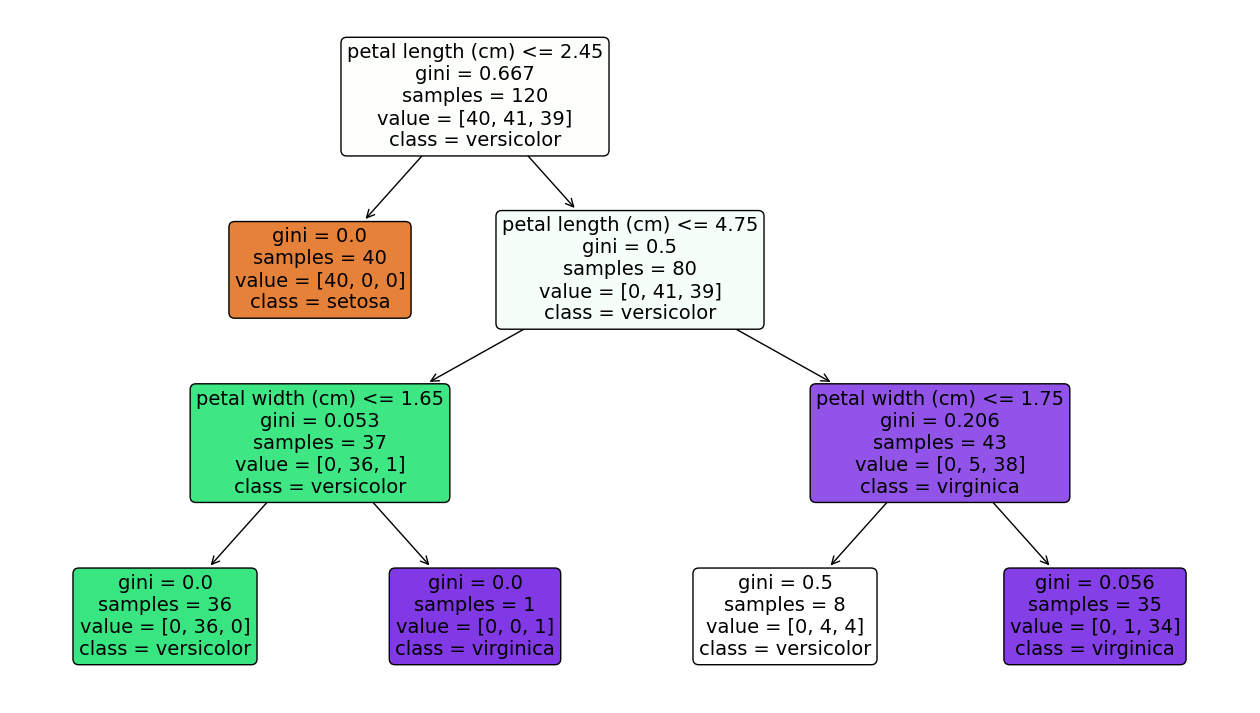

In [19]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

plot_tree(tree_clf,rounded=True, filled=True, fontsize=14,
          class_names=iris.target_names, feature_names=iris.feature_names)

"""
print("Feature importance decision tree")
for name, score in zip(iris.feature_names, tree_clf.feature_importances_):
    print(name, score)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

print("Feature importance random forest")
for name, score in zip(iris.feature_names, rf_clf.feature_importances_):
    print(name, score)
    
print(f"Accuracy Entscheidungsbaum:{accuracy_score(y_test, tree_clf.predict(X_test))}")
print(f"Accuracy Random Forest:{accuracy_score(y_test, rf_clf.predict(X_test))}")
"""

In [6]:
list(X.columns)

['Wetterlage_sonnig', 'Schnee_Nein', 'Auto kaputt_Nein', 'Start 8:00_Nein']